In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")  

# Problem Statement

In [87]:
file1=pd.read_csv('D:/program session/project/Singapore resales/file1.csv')
file2=pd.read_csv('D:/program session/project/Singapore resales/file2.csv')
file3=pd.read_csv('D:/program session/project/Singapore resales/file3.csv')
file4=pd.read_csv('D:/program session/project/Singapore resales/file4.csv')
file5=pd.read_csv('D:/program session/project/Singapore resales/file5.csv')

**The csv on based historical time series data first we should Merge the database using pandas concat function**

In [88]:
df = pd.concat([file1, file2, file3, file4, file5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
912981,2023-05,YISHUN,EXECUTIVE,827,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,829000.0,63 years 06 months
912982,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,855000.0,63 years 06 months
912983,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,860000.0,63 years 07 months
912984,2023-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0,63 years 11 months


## Basic Analysis of Dataset from Problem Statement and Features¶

#### 1.it is a supervised learning problem - We are predicting target variable
#### 2.i've identified it as a regression problem.
#### 3.Regression problems involve predicting a continuous numerical value, and in this case, i'm predicting the resale price

# Analysis of Dataset

In [89]:
# **checking any space,dot,anything inside columns**
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [90]:
#Basic statistical analysis of dataset
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,912986.000000,912986.000000,9.129860e+05
mean,95.699110,1988.121295,3.165535e+05
std,25.853062,10.502693,1.668373e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.910000e+05
50%,93.000000,1986.000000,2.940000e+05
75%,113.000000,1996.000000,4.110000e+05
max,307.000000,2022.000000,1.500000e+06


In [92]:
# checking for the data is balanced or not
df['resale_price'].value_counts()

resale_price
300000.0     6880
350000.0     6752
280000.0     6538
320000.0     6475
250000.0     6279
             ... 
162750.0        1
189400.0        1
215030.0        1
339088.0        1
1051800.0       1
Name: count, Length: 9326, dtype: int64

**Data is Balanced so will go 6Jar of Machine learning**

# Data Cleaning

## Missing Value

In [93]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [94]:
# Remaining lease column will unathurorised data like (63 years 06 months) so will convert float month wise
# so using pd.notna and isinstance function to convert
# pd.notna(row): Checks if the value of row is not NaN (not a null value). It returns True otherwise.through False 
# isinstance(row, str): Checks if the type of row is a string. It returns True otherwise.through False 


# function to convert the years and months to years in decimal
def convert_to_years(row):
    if pd.notna(row):
        if isinstance(row, str):
            if 'years' in row:
                parts = row.split()
                years = float(parts[0])
                if len(parts) > 2:  # If there's a month part as well
                    months = float(parts[2])
                    return years + months / 12
                else:
                    return years
        else:
          return row
    return row

In [95]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)


In [96]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
912984,2023-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0,63.916667
912985,2023-06,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,159.0,Multi Generation,1987,935000.0,63.500000


In [97]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711630
95.000000      2257
67.000000      2209
69.000000      1902
71.000000      1746
              ...  
97.083333         1
96.833333         1
97.250000         1
97.583333         1
97.750000         1
Name: count, Length: 665, dtype: int64

In [98]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

## Wrong Formate

In [99]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

#### Month

In [100]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


#### Storey_range	

In [101]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
912984,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0,63.916667,2023,01,7,9
912985,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,159.0,Multi Generation,1987,935000.0,63.500000,2023,06,4,6


In [102]:
df.drop('storey_range', axis = 1, inplace= True)

#### covert

In [103]:
df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [104]:
df.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6


In [105]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

## Text Errors

In [106]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [107]:
df['town'].value_counts()

town
TAMPINES           78994
YISHUN             69090
BEDOK              65951
JURONG WEST        65657
WOODLANDS          64498
ANG MO KIO         51547
HOUGANG            49901
BUKIT BATOK        43551
CHOA CHU KANG      37676
BUKIT MERAH        33827
PASIR RIS          32874
SENGKANG           31456
TOA PAYOH          31154
QUEENSTOWN         28429
GEYLANG            27883
CLEMENTI           27758
BUKIT PANJANG      27269
KALLANG/WHAMPOA    26767
JURONG EAST        24477
SERANGOON          22592
BISHAN             21084
PUNGGOL            19640
SEMBAWANG          13334
MARINE PARADE       7971
CENTRAL AREA        7056
BUKIT TIMAH         2486
LIM CHU KANG          64
Name: count, dtype: int64

In [108]:
df['flat_type'].value_counts()

flat_type
4 ROOM              346264
3 ROOM              292493
5 ROOM              192196
EXECUTIVE            68783
2 ROOM               11413
1 ROOM                1299
MULTI GENERATION       279
MULTI-GENERATION       259
Name: count, dtype: int64

In [109]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
   

In [110]:
df['flat_type'].value_counts()

flat_type
4 ROOM              346264
3 ROOM              292493
5 ROOM              192196
EXECUTIVE            68783
2 ROOM               11413
1 ROOM                1299
MULTI GENERATION       538
Name: count, dtype: int64

In [111]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17421
BEDOK RESERVOIR RD    14595
ANG MO KIO AVE 10     13687
ANG MO KIO AVE 3      12052
HOUGANG AVE 8          9262
                      ...  
SEMBAWANG WAY            12
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
TAMPINES ST 61            1
Name: count, Length: 583, dtype: int64

In [112]:
df['flat_model'].value_counts()

flat_model
Model A                   189078
Improved                  164895
New Generation            108413
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          45372
Simplified                 33800
Apartment                  25142
Standard                   24847
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17093
MAISONETTE                 12215
Model A2                    9981
APARTMENT                   9901
DBSS                        3159
Adjoined flat               1231
Model A-Maisonette          1071
MODEL A-MAISONETTE           982
Terrace                      441
Type S1                      427
MULTI GENERATION             279
Multi Generation             259
TERRACE                      247
Type S2                      210
Premium Apartment Loft       103
Premium Maisonette            86
Improved-Maisonette           81
2-room                        80

In [113]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [114]:
df['flat_model'].value_counts()

flat_model
Model A                   259459
Improved                  238484
New Generation            187311
Simplified                 57058
Premium Apartment          45378
Standard                   42222
Apartment                  35043
Maisonette                 29308
Model A2                    9981
DBSS                        3159
Model A-Maisonette          2053
Adjoined flat               1231
Terrace                      688
Multi Generation             538
Type S1                      427
Type S2                      210
Improved-Maisonette          125
Premium Apartment Loft       103
2-room                       101
Premium Maisonette            86
3Gen                          21
Name: count, dtype: int64

## duplicates

In [115]:
df.duplicated().sum()

2321

In [116]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

# Exploratary Data Analysis

## Categorical Vs Frequency using BarPlot 

In [117]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

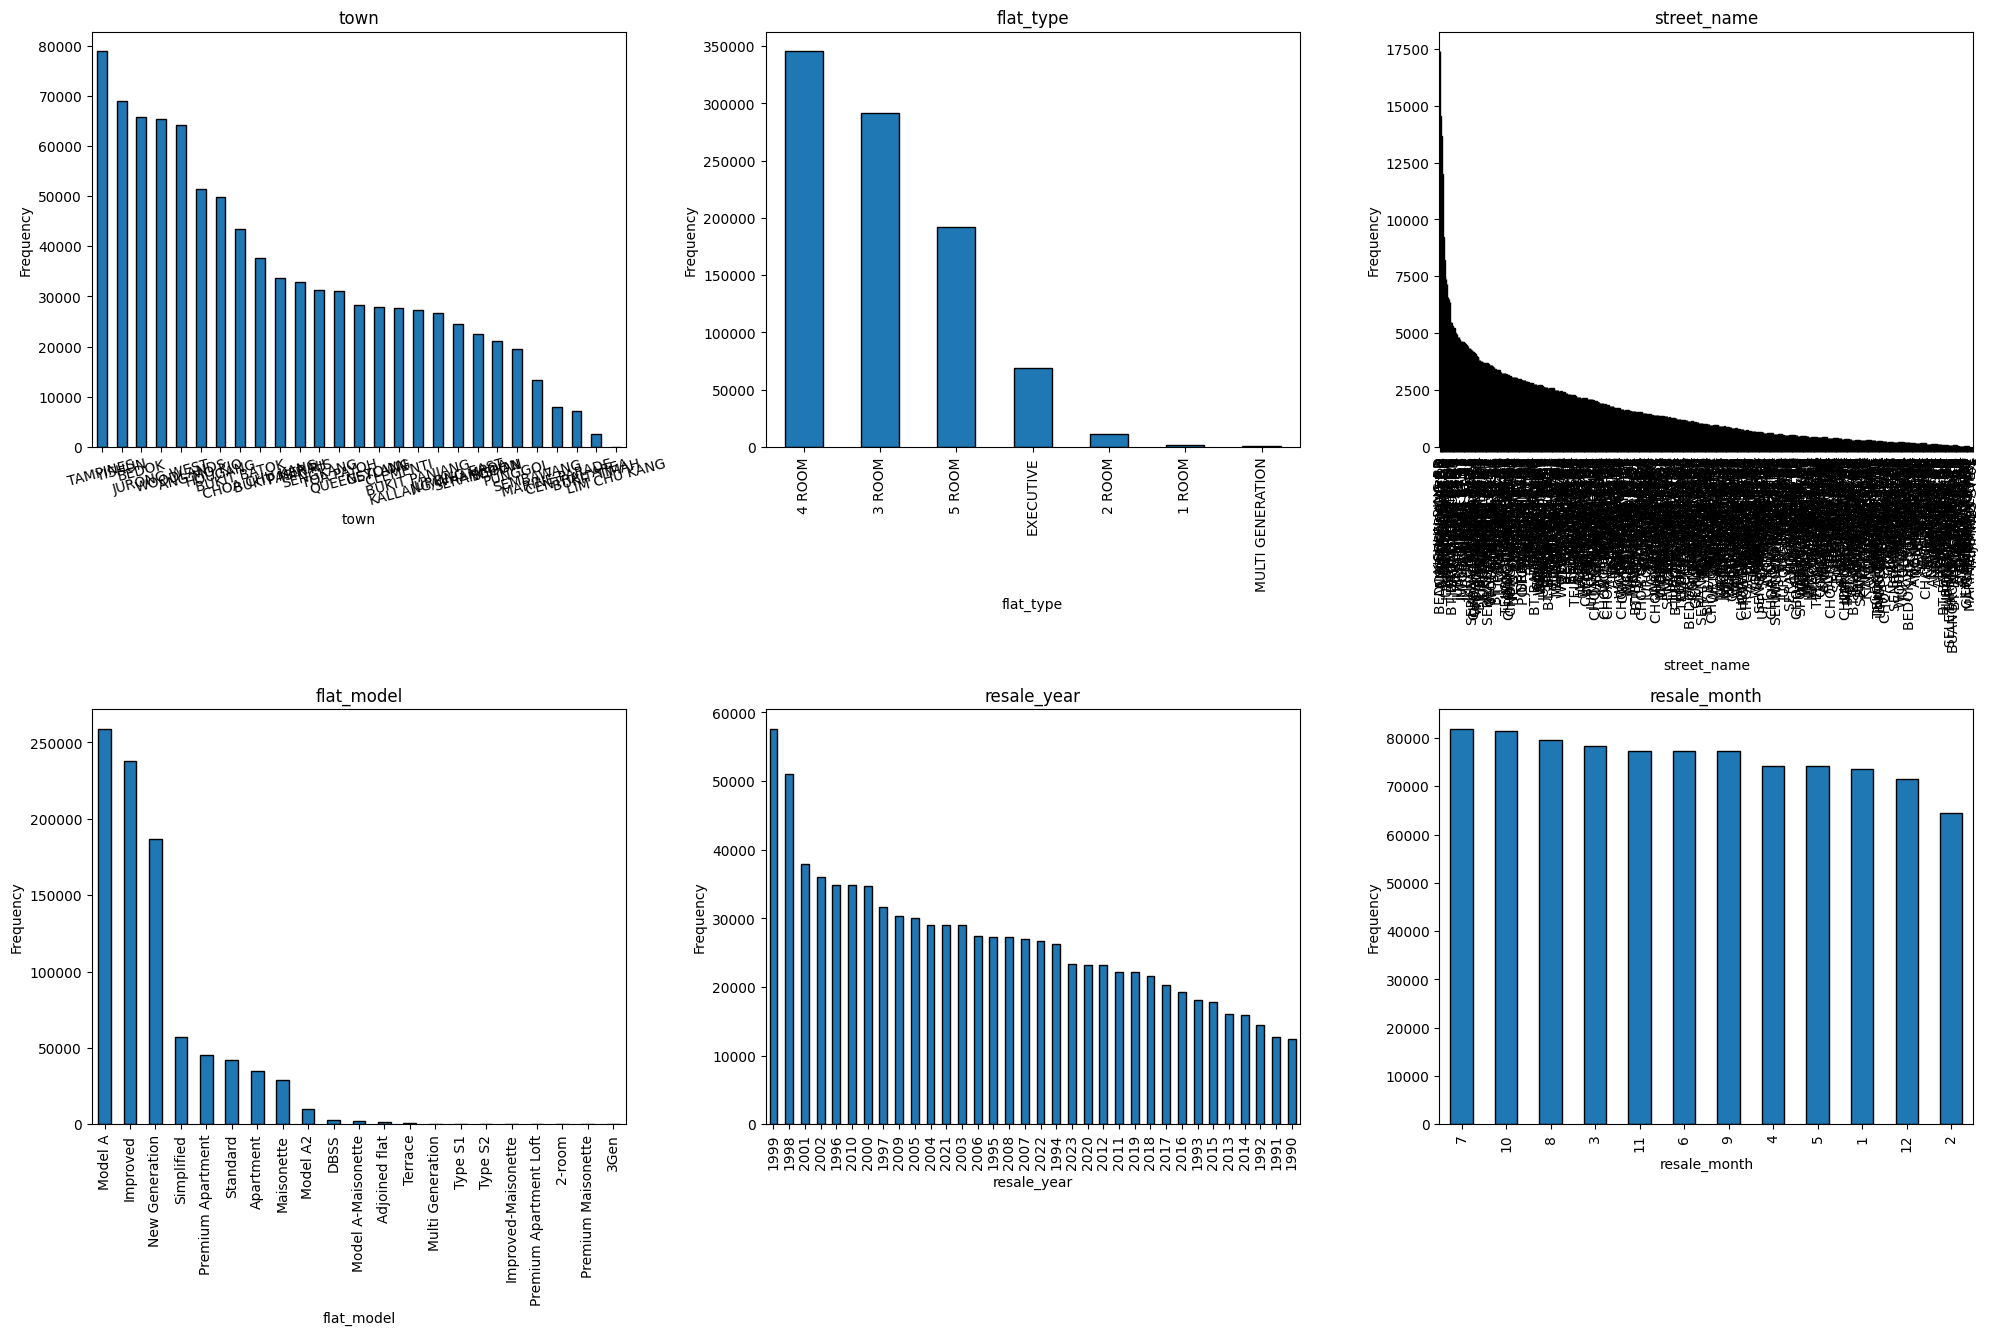

In [118]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Feature Vs Target (Categorical Data )

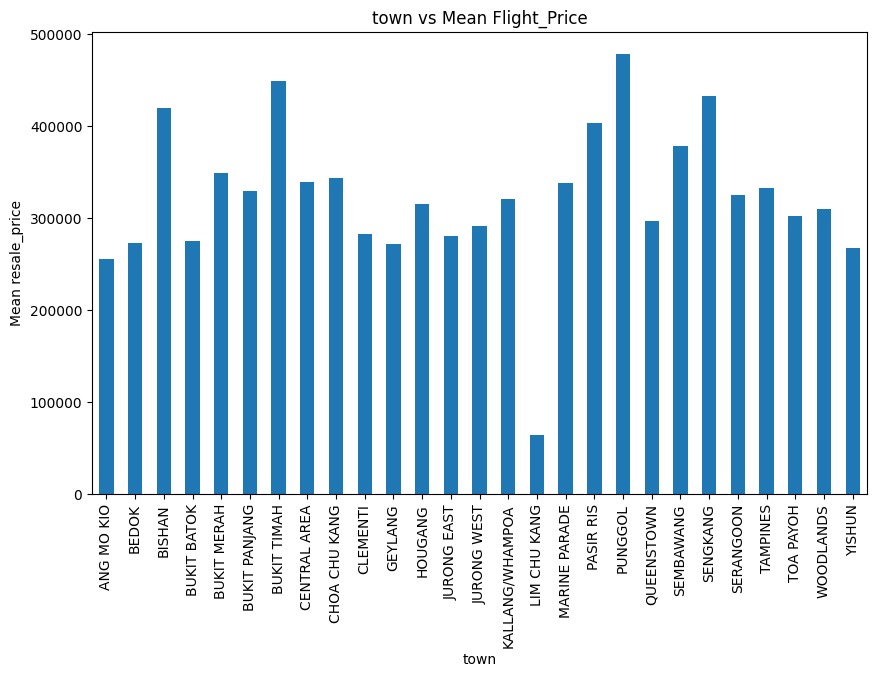

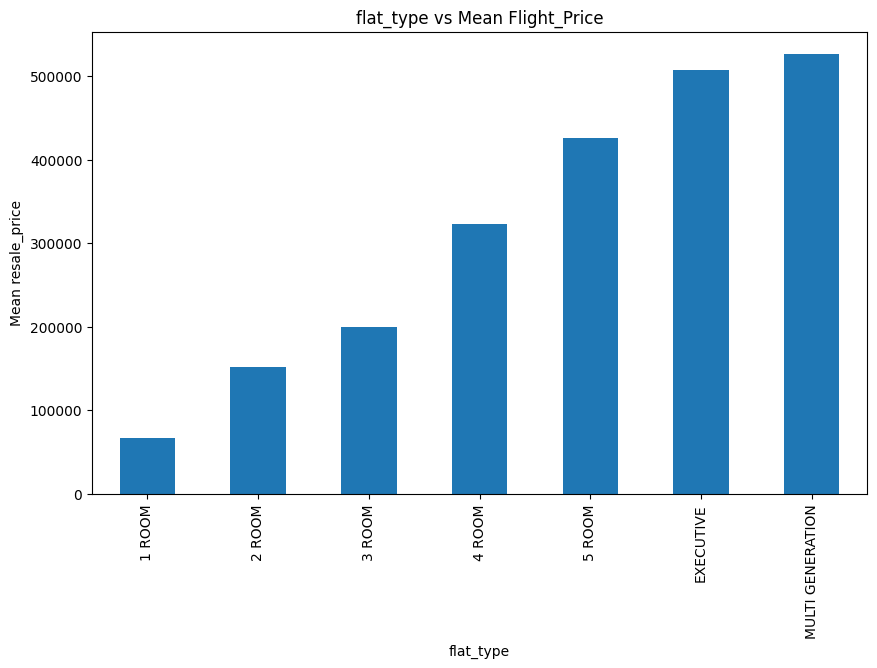

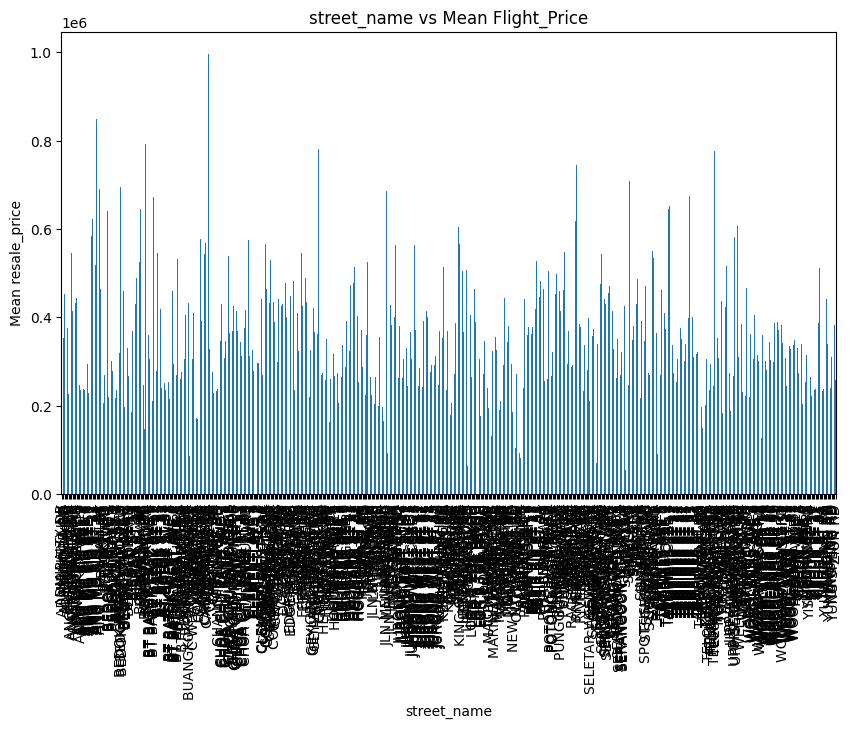

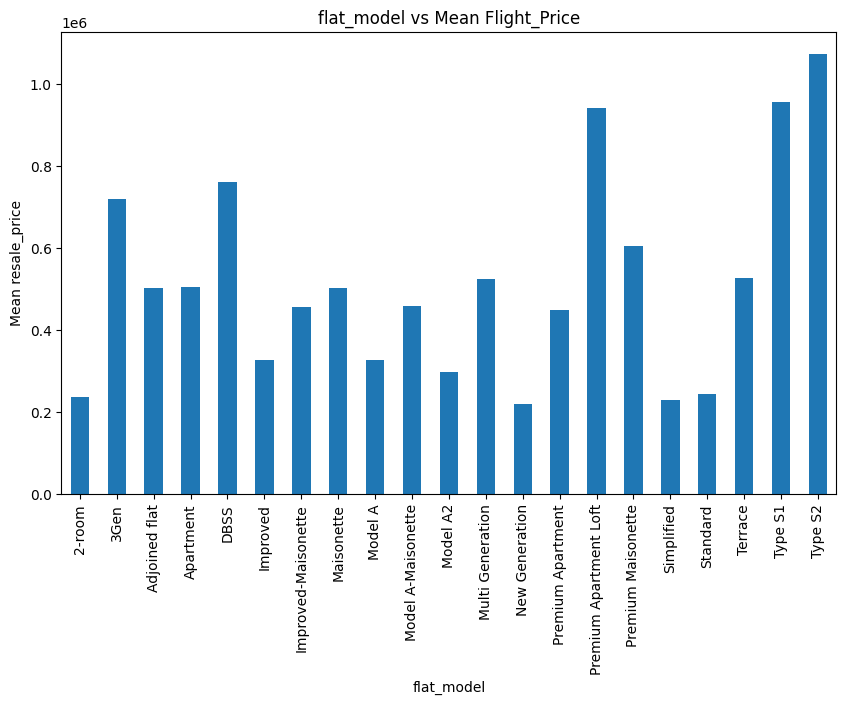

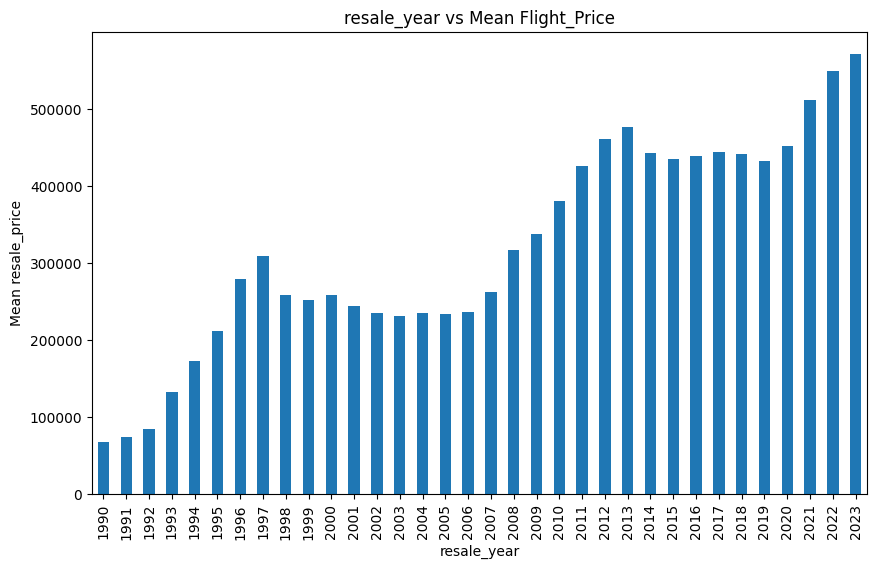

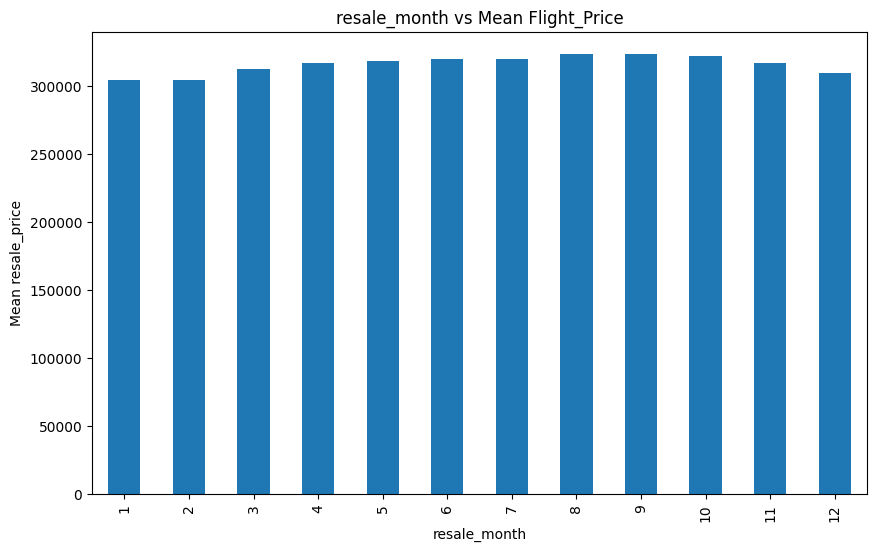

In [119]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

## Feature Vs Target (Condinues Data )

In [120]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [121]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

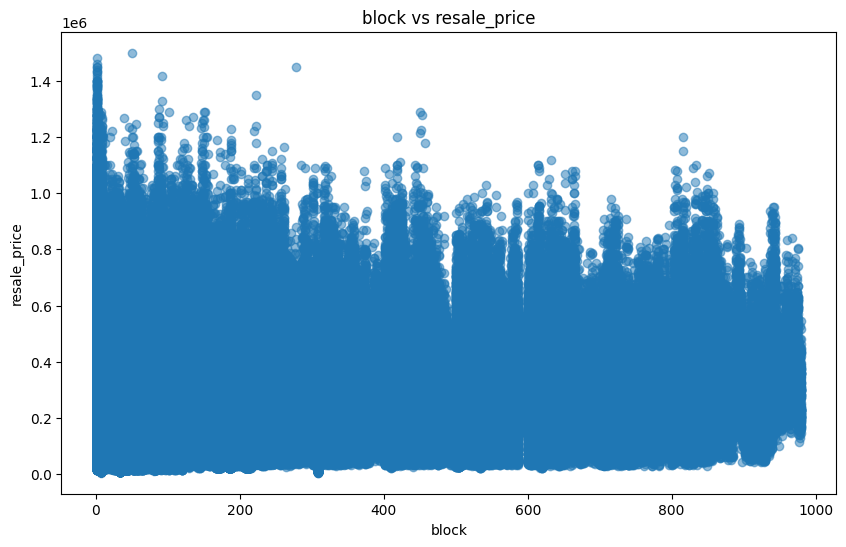

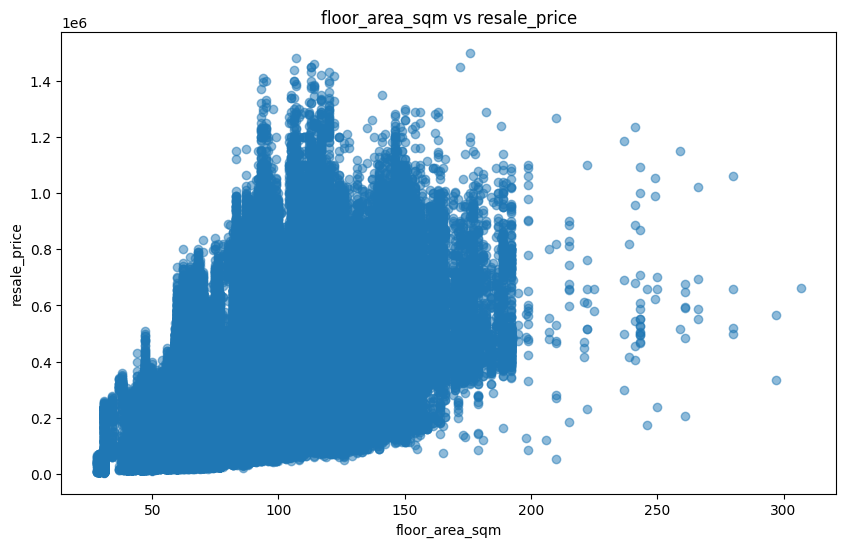

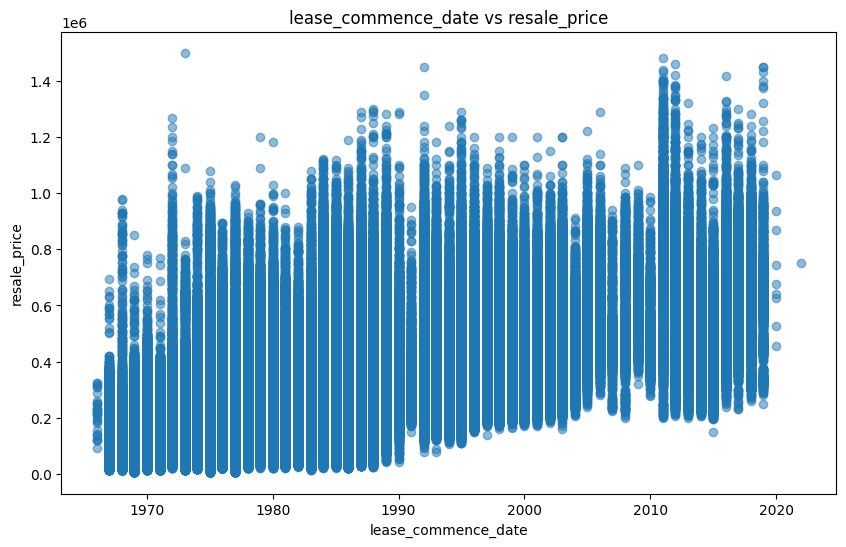

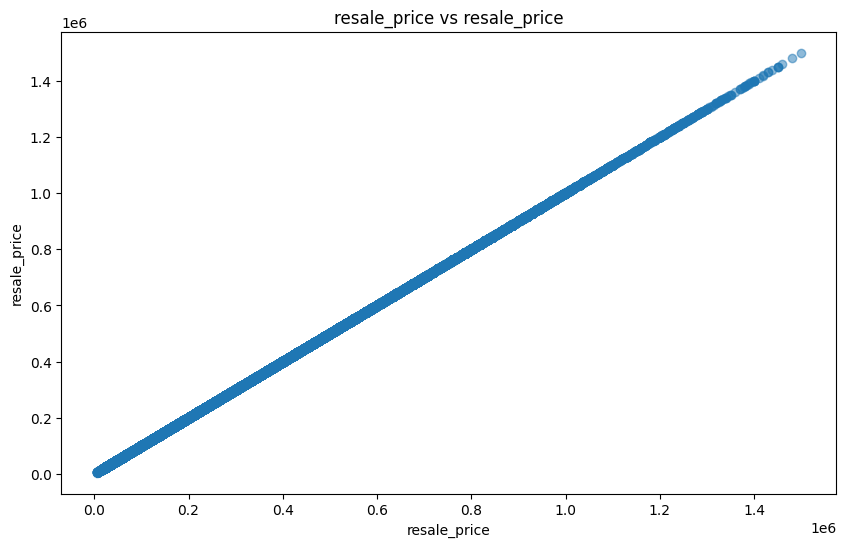

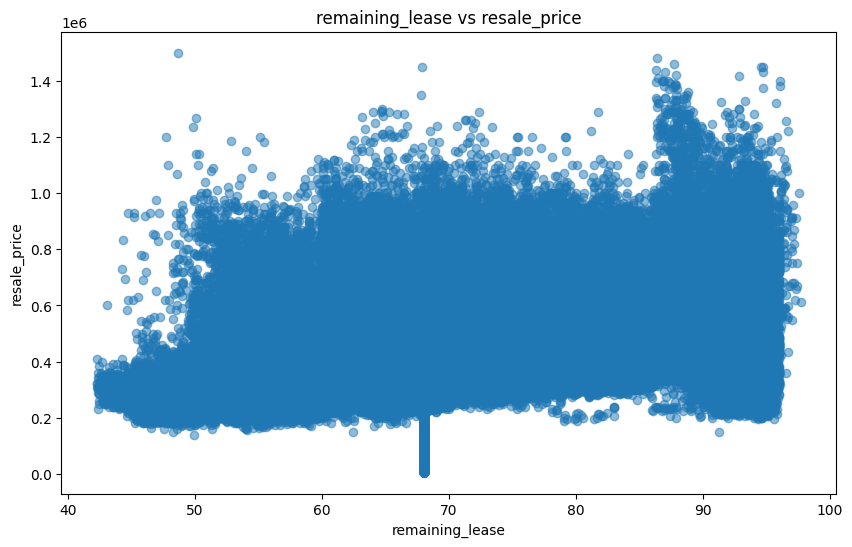

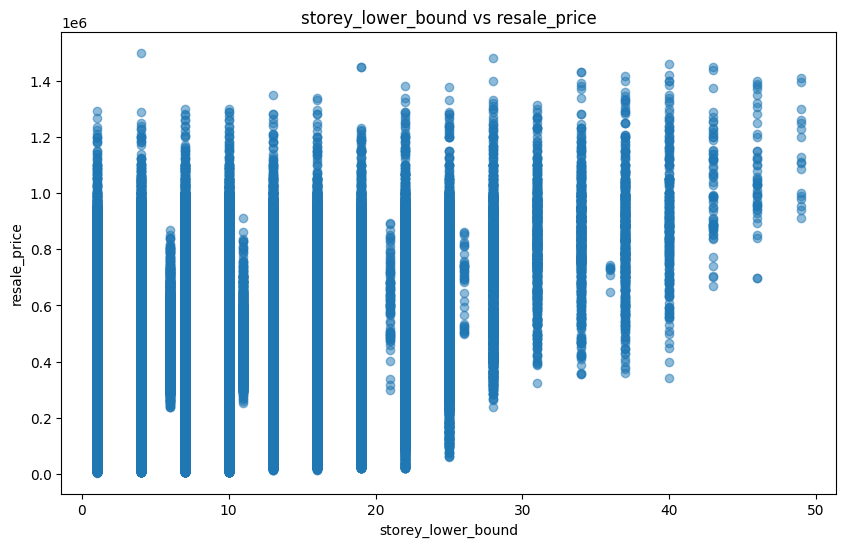

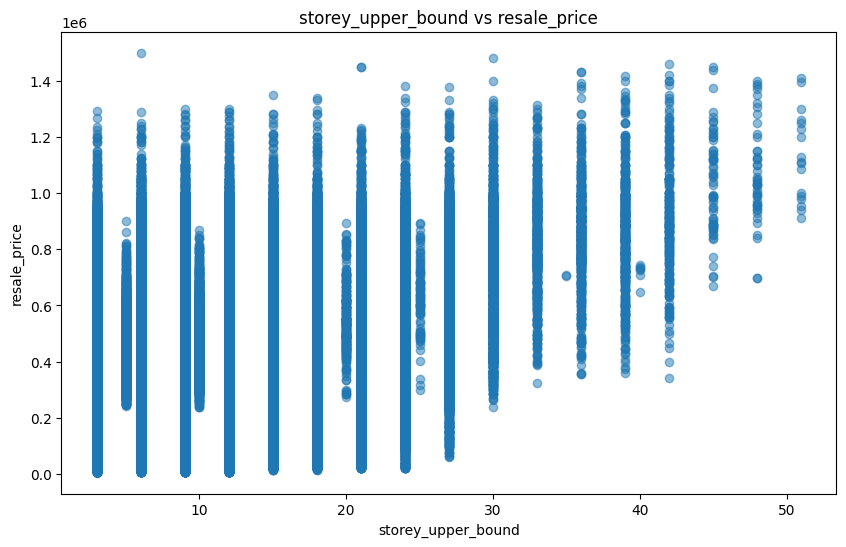

In [122]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

# Encoding Categorical Variables

In [123]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [124]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [125]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [126]:

# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977,6000.0,68.0,1990,1,4,6


In [127]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [128]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977,6000.0,68.0,1990,1,4,6


In [129]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977,6000.0,68.0,1990,1,4,6


In [130]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977,6000.0,68.0,1990,1,4,6


# Split

In [131]:
X = df1.drop('resale_price',axis=1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=80)

In [132]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(728532, 12) (182133, 12) (728532,) (182133,)


# Scalling

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 1.71418739, -0.01438791, -0.67955385, ...,  1.29872992,
          1.31964532,  1.31648909],
        [ 1.32923262, -0.01438791,  0.1355243 , ...,  0.41672067,
          1.31964532,  1.31648909],
        [ 1.58586914, -0.01438791, -1.11375437, ..., -1.6413009 ,
          0.69489869,  0.69175463],
        ...,
        [ 0.43100482, -0.01438791, -0.24154457, ...,  1.29872992,
         -0.55459457, -0.55771431],
        [ 0.94427785, -0.01438791,  1.33528887, ...,  1.29872992,
         -0.55459457, -0.55771431],
        [ 0.55932308,  2.0944654 ,  0.09362776, ...,  1.00472684,
         -1.1793412 , -1.18244878]]),
 array([[ 1.07259611, -0.01438791,  0.50497561, ...,  0.41672067,
          0.69489869,  0.69175463],
        [ 1.07259611, -0.01438791, -0.21869191, ...,  0.71072376,
          0.07015206,  0.06702016],
        [-0.0822682 , -1.06881457, -1.11375437, ...,  1.00472684,
          2.56913858,  2.56595803],
        ...,
        [-0.33890472,  2.0944654 ,  0.55829848, ..., -

# Model_Fit

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear Regression

In [135]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[177843.91543427 279213.89180499 352467.71274879 ... 413241.04842247
 159906.04134462 567036.84997712]
134551    265000.0
446831    178000.0
689986    380000.0
556530    420000.0
288270    334000.0
            ...   
346401    143000.0
192906    500000.0
298305    495000.0
173957    200000.0
594700    667000.0
Name: resale_price, Length: 182133, dtype: float64


In [136]:
linear_model.score(X_test, y_test)

0.7766689652996699

In [137]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.7767282814829096

## K Nearest Neighbor Regression

In [138]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)


Mean Absolute Error (MAE)    : 30078.25690711733
Mean Squared Error (MSE)     : 2059654147.5921285
Root Mean Square Error (RMSE): 45383.4126922175
R-squared (R2) Score         : 0.9265608076168936


## Decision Tree Regression

In [139]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)


Mean Absolute Error (MAE)    : 18160.260798981068
Mean Squared Error (MSE)     : 756029732.7357562
Root Mean Square Error (RMSE): 27495.9948489913
R-squared (R2) Score         : 0.9730429436152478


## Random Forest Regression

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2)

Mean Absolute Error (MAE)    : 14355.0335329149
Mean Squared Error (MSE)     : 447730241.01178145
Root Mean Square Error (RMSE): 21159.637071835175
R-squared (R2) Score         : 0.9840356948549644


## Xg Boost

In [141]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2)


Mean Absolute Error (MAE)    : 17550.333096709342
Mean Squared Error (MSE)     : 626058562.9518993
Root Mean Square Error (RMSE): 25021.162302177316
R-squared (R2) Score         : 0.9776772060001112


# Suggestion

In [142]:
rf_regressor.feature_importances_

array([0.04888097, 0.05137438, 0.01580561, 0.02563549, 0.27763009,
       0.01045704, 0.03544505, 0.00451738, 0.50614695, 0.00625529,
       0.00778319, 0.01006856])

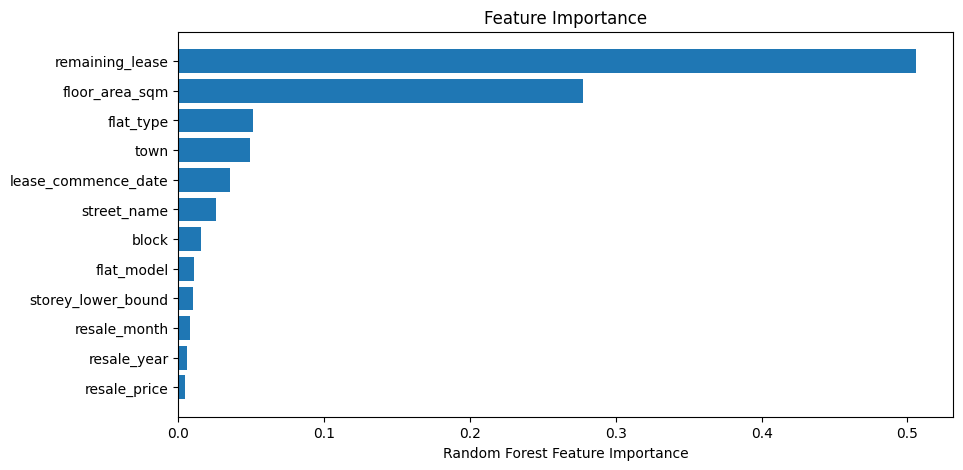

In [143]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

# Convert CSV

In [144]:
# get sample to predict the resale price
pre_df =df1.sample(n=2)
pre_df
     

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
819162,22,5,175.0,314,133.0,14,1986,430000.0,65.416667,2020,6,7,9
544114,13,4,2.0,477,91.0,16,2000,306000.0,68.000000,2008,3,10,12


In [145]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

In [146]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([423883.88      , 301356.66666667])

In [158]:
df1.columns



Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'resale_year', 'resale_month', 'storey_lower_bound',
       'storey_upper_bound'],
      dtype='object')

In [149]:
# # save the processed data for the deployment
df1.to_csv('final.csv')